In [292]:
# Packages
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from house_prices.adhoc_functions.model import vis_all
from sklearn.linear_model import LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, BayesianRidge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score
%matplotlib inline

In [195]:
# Options
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', -1)

In [196]:
explore_in = './data/transformed_data/explore.csv'
train_in = './data/transformed_data/model_train_linear.csv'
test_in = './data/transformed_data/model_test_linear.csv'
model_out = './data/transformed_data/linear_models.csv'

In [284]:
drop_vars = [
    'Id', 'Neighborhood', 'MSZoning', 'BldgType', 'Functional', 'MSSubClass', 
    'Condition1', 'LotConfig', 'MasVnrType', 'SaleType', 'SaleCondition', 'Stories',
]
keep_vars = [
    'SalePrice',            # Target
    'OverallQual',          # 0.8
#     'ExterQual',            # 0.7
#     'YearBuilt',            # 0.5
#     'YearRemodAdd',         # 0.5
#     'MasVnrArea',           # 0.5
    'TotalBsmtSF',          # 0.6
    '1stFlrSF',             # 0.6
    'GrLivArea',            # 0.7
#     'FullBath',             # 0.6
    'KitchenQual',          # 0.7
    'TotRmsAbvGrd',         # 0.5
    'Fireplaces',           # 0.5
#     'GarageCars',           # 0.6
    'GarageArea',           # 0.6
#     'PropertyAge',          #-0.5
    'TotalBath',            # 0.6
#     'HasPorch',             # 0.4
    'HeatingQC',            # 0.4
    'TotalArea',            # 0.8
    'CoreArea',             # 0.8
    'Neighborhood_ordinal', # 0.7
    'MSSubClass_ordinal',   # 0.5
#     'MasVnrType_ordinal',   # 0.4
    'Foundation_ordinal',   # 0.5 
#     'SaleType_ordinal',     # 0.4
    'SaleCondition_ordinal',# 0.3
]

test_vars = keep_vars.copy()
test_vars.remove('SalePrice')

#### Train Data

In [285]:
df_train_in = pd.read_csv(train_in)
features = df_train_in[keep_vars].drop('SalePrice', axis=1)
target = np.log1p(df_train_in['SalePrice'])
features.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,TotalBath,HeatingQC,TotalArea,CoreArea,Neighborhood_ordinal,MSSubClass_ordinal,Foundation_ordinal,SaleCondition_ordinal
0,0.510826,0.131114,0.113132,0.230501,0.666667,0.500000,0.000000,0.326754,0.5,1.00,0.195330,0.178548,0.666667,1.000000,1.000000,0.5
1,0.441833,0.187762,0.193049,0.161124,0.333333,0.333333,0.333333,0.280960,0.3,1.00,0.170937,0.175467,0.791667,0.714286,0.666667,0.5
2,0.510826,0.140260,0.126161,0.241808,0.666667,0.333333,0.333333,0.356816,0.5,1.00,0.205897,0.188753,0.666667,1.000000,1.000000,0.5
3,0.510826,0.116655,0.134420,0.231548,0.666667,0.416667,0.333333,0.373459,0.2,0.75,0.191092,0.171712,0.750000,0.642857,0.333333,0.0
4,0.575364,0.171764,0.170666,0.300969,0.666667,0.583333,0.333333,0.463459,0.5,1.00,0.255683,0.233910,0.958333,1.000000,1.000000,0.5


In [286]:
def rmse(pred, true):
    error = 0
    for x,y in zip(pred,true):
        error+=(x-y)**2
    error/=len(pred)
    return np.sqrt(error)


def validate_model(model, train_features, train_target, test_features, test_target):
    model.fit(train_features, train_target)
    print("Training Error: ", rmse(model.predict(train_features), train_target))
    print("Test Error: ", rmse(model.predict(test_features), test_target))

In [287]:
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state = 42
)

train_features = train_features.as_matrix()
test_features = test_features.as_matrix()
train_target = train_target.as_matrix()
test_target = test_target.as_matrix()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


#### Submission Data

In [288]:
df_sub_in = pd.read_csv('./data/transformed_data/model_test_linear.csv')
sub_features = df_sub_in[test_vars]
sub_features.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,TotalBath,HeatingQC,TotalArea,CoreArea,Neighborhood_ordinal,MSSubClass_ordinal,Foundation_ordinal,SaleCondition_ordinal
0,0.367725,0.159659,0.099220,0.099220,0.6,0.166667,0.00,0.399173,0.000000,0.50,0.098318,0.114879,0.375000,0.067114,0.666667,0.5
1,0.441833,0.231781,0.179545,0.179545,0.8,0.250000,0.00,0.190354,0.083333,0.50,0.179545,0.193603,0.375000,0.067114,0.666667,0.5
2,0.367725,0.167326,0.105382,0.231640,0.6,0.250000,0.25,0.280601,0.250000,0.75,0.191299,0.184876,0.541667,0.093960,1.000000,0.5
3,0.441833,0.166994,0.104998,0.227401,0.8,0.333333,0.25,0.274491,0.250000,1.00,0.188241,0.182530,0.541667,0.093960,1.000000,0.5
4,0.575364,0.224124,0.170772,0.170772,0.8,0.166667,0.00,0.292710,0.166667,1.00,0.170772,0.185137,0.916667,0.087248,1.000000,0.5


#### Ridge

In [289]:
# CV Model
alphas = [0.0001, 0.001, 0.01, 0.03, 0.06, 0.1, 0.2]
ridge = RidgeCV(alphas=alphas, cv=20)
validate_model(ridge, train_features, train_target, test_features, test_target)

Training Error:  0.1458750239993885
Test Error:  0.1456480957072443


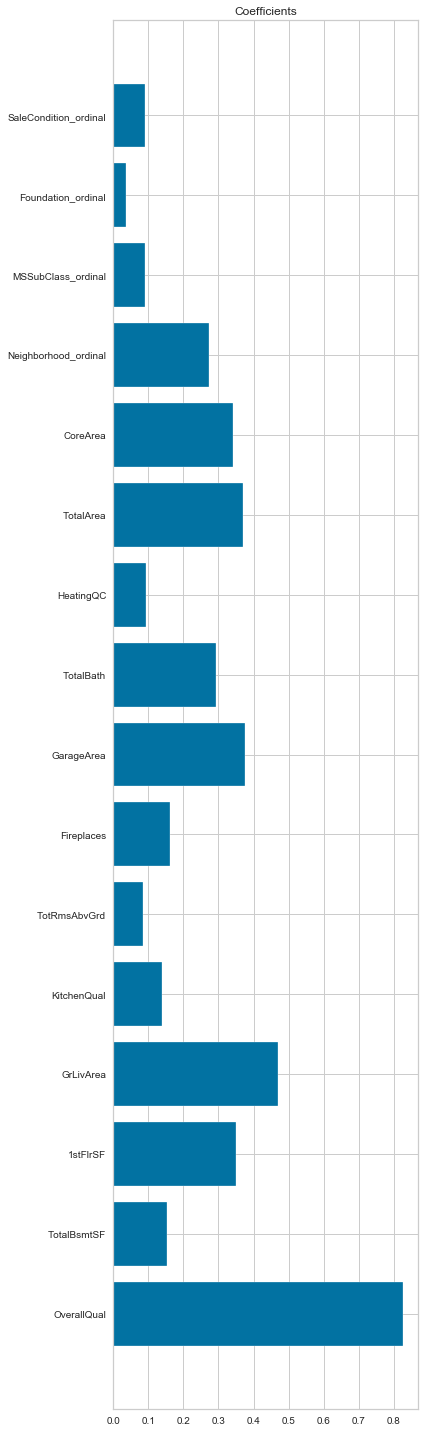

In [290]:
coefs = ridge.coef_
plt.figure(figsize=(6, 20))
plt.barh(np.arange(coefs.size), coefs)
plt.yticks(np.arange(coefs.size), features)
plt.title("Coefficients")
plt.tight_layout()

In [291]:
# Final Model
alpha = ridge.alpha_
ridge = Ridge(alpha=alpha)
ridge.fit(features, target)

# Submission
df_sub = pd.DataFrame()
df_sub['Id'] = df_sub_in['Id']
df_sub['SalePrice'] = np.round(np.expm1(ridge.predict(sub_features)),0)
df_sub['SalePrice'] = (df_sub['SalePrice'] / 100).astype(int) * 100
df_sub.to_csv('./data/output_data/ridge_submission.csv', index=False)

#### Lasso

In [181]:
alphas = [0.01, 0.03, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 5, 10, 50]
lasso = LassoCV(alphas=alphas, cv=20)
validate_model(lasso, train_features, train_target, test_features, test_target)

Training Error:  0.19142274869642642
Test Error:  0.21148287170096364


#### Elastic

In [182]:
l1_ratio=0
alphas=[0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10],
elastic = ElasticNetCV(l1_ratio=l1_ratio, alphas=alphas, max_iter=5000, cv=20)
validate_model(elastic, train_features, train_target, test_features, test_target)

Training Error:  0.3068905367629894
Test Error:  0.34400260787606846


#### Bayesian Ridge

In [310]:
param_grid = {
    'alpha_1': [0.00001, 0.0001, 0.001, 0.01, 0.03, 0.06, 0.1, 0.2, 0.5, 1],
    'alpha_2': [10, 20, 30],
    'lambda_1': [0.00001, 0.0001, 0.001],
    'lambda_2': [10, 20, 30]
}

bayes = GridSearchCV(cv=5, estimator=BayesianRidge(), param_grid=param_grid)
validate_model(bayes, train_features, train_target, test_features, test_target)
params = bayes.best_params_
params

Training Error:  0.14584851455213116
Test Error:  0.1454225140938464


{'alpha_1': 1e-05, 'alpha_2': 30, 'lambda_1': 0.001, 'lambda_2': 10}

In [315]:
bayes = BayesianRidge(alpha_1=0.00001, alpha_2=30, lambda_1=0.001, lambda_2=10)
bayes.fit(features, target)

# Submission
df_sub = pd.DataFrame()
df_sub['Id'] = df_sub_in['Id']
df_sub['SalePrice'] = np.round(np.expm1(bayes.predict(sub_features)),0)
df_sub['SalePrice'] = (df_sub['SalePrice'] / 100).astype(int) * 100
df_sub.to_csv('./data/output_data/bayes_submission.csv', index=False)

#### Ridge Prediction Error

In [ ]:
visualizer = PredictionError(ridge)
visualizer.fit(features, target)  
visualizer.poof()             

#### Ridge Submission

In [ ]:
predictions = ridge.predict(test_features)
df_sub = pd.DataFrame()
df_sub['Id'] = df_test_in['Id']
df_sub['SalePrice'] = np.expm1(ridge.predict(test_features))
df_sub.to_csv('./data/output_data/ridge_submission.csv', index=False)

#### Lasso

In [ ]:
scoring = make_scorer(mean_squared_error)
alphas = [0.01, 0.03, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 5, 10, 50]
lasso = LassoCV(alphas=alphas)
lasso.fit(features, target)
mse = cross_val_score(lasso, features, target, cv=20, scoring=scoring)
rmse = np.sqrt(mse)
score = np.mean(rmse)
score

#### Lasso Coefficients

In [ ]:
coefs = lasso.coef_
plt.figure(figsize=(6, 20))
plt.barh(np.arange(coefs.size), coefs)
plt.yticks(np.arange(coefs.size), features)
plt.title("Coefficients")
plt.tight_layout()

#### Lasso Submission

In [ ]:
predictions = lasso.predict(test_features)
df_sub = pd.DataFrame()
df_sub['Id'] = df_test_in['Id']
df_sub['SalePrice'] = np.expm1(lasso.predict(test_features))
df_sub.to_csv('./data/output_data/lasso_submission.csv', index=False)

#### ElasticNet

In [ ]:
scoring = make_scorer(mean_squared_error)
l1_ratio=0.5,
alphas=[0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10],
elastic = ElasticNetCV(l1_ratio=l1_ratio, alphas=alphas, max_iter=5000)
elastic.fit(features, target)
elastic_score = np.mean(np.sqrt(cross_val_score(elastic, features, target, cv=20, scoring=scoring)))
elastic_score

In [ ]:
coefs = elastic.coef_
plt.figure(figsize=(6, 20))
plt.barh(np.arange(coefs.size), coefs)
plt.yticks(np.arange(coefs.size), features)
plt.title("Coefficients")
plt.tight_layout()